# Netflix Data: Cleaning, Analysis and Visualization

## Step 0: Domain Knowledge

- Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents.
- This dataset is a cleaned version of the original version which can be found **[here](https://www.kaggle.com/datasets/shivamb/netflix-shows)**.
- The data consist of contents added to Netflix from 2008 to 2021.
- The oldest content is as old as 1925 and the newest as 2021.
- This dataset will be cleaned with PostgreSQL and visualized with Tableau.
- The purpose of this dataset is to test my data cleaning and visualization skills.
- The cleaned data can be found below and the Tableau dashboard can be found **[here](https://public.tableau.com/app/profile/abdulrasaq.ariyo/viz/NetflixTVShowsMovies_16615029026580/NetflixDashboard)**.

## Step 1: Ask Questions

## Step 2: Wrangle Data

### Assess Data

- Import necessary modules:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

- Read the data:

In [2]:
netflix = pd.read_csv("netflix.csv")

- Explore the data shape:

In [3]:
netflix.shape

(8790, 10)

- Explore the firt few raws:

In [4]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


- check for column names, dtypes, missing values and more:

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


- View some stats:

In [6]:
netflix.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8790.0,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0


### Get the Data Ready for EDA

- Convert `date_added` to datetime:

In [7]:
netflix["date_added"] = pd.to_datetime(netflix["date_added"], format="%m/%d/%Y")
netflix["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

## Step 3: Perform EDA (Exploratory Data Analysis)

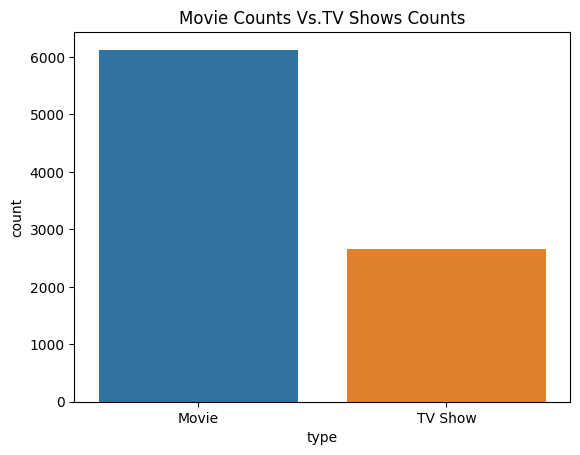

In [8]:
ax = sns.countplot(data=netflix, x="type")
ax.set_title("Movie Counts Vs.TV Shows Counts");

In [9]:
grouped_by_release_year_and_type = netflix.groupby(by=["release_year", "type"])[["type"]].count()
grouped_by_release_year_and_type.head()

,,type
release_year,type,
1925,TV Show,1
1942,Movie,2
1943,Movie,3
1944,Movie,3
1945,Movie,3


In [10]:
grouped_by_release_year_and_type.rename(columns={"type": "counts"}, inplace=True)
grouped_by_release_year_and_type.reset_index(level="type", inplace=True)

In [11]:
grouped_by_release_year_and_type.head()

,type,counts
release_year,,
1925,TV Show,1
1942,Movie,2
1943,Movie,3
1944,Movie,3
1945,Movie,3


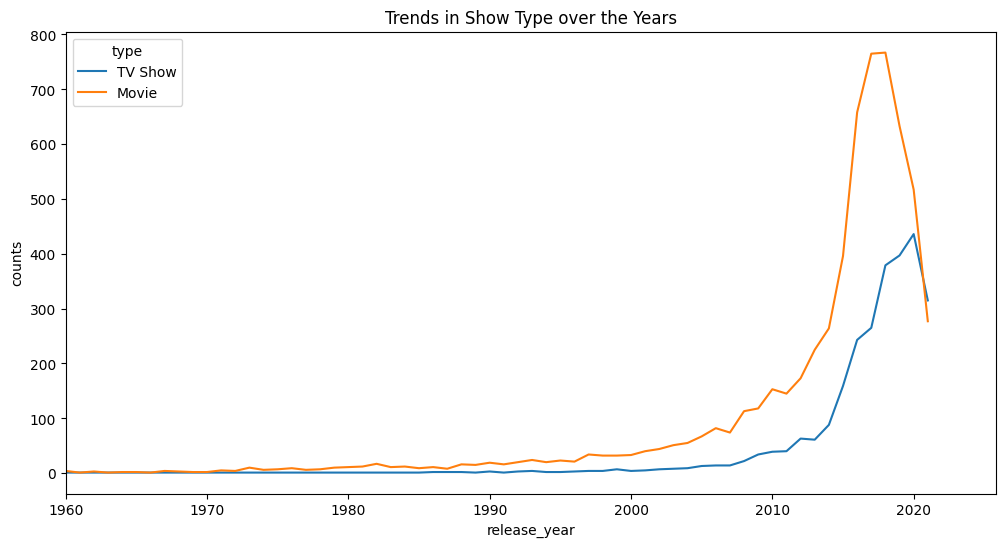

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=grouped_by_release_year_and_type, x="release_year", y="counts", hue="type", ax=ax)
ax.set_xlim(left=1960)
ax.set_title("Trends in Show Type over the Years");

## Step 4: Draw Conclusions

## Step 5: Communicate Your Results